# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print('Beginning Data Retrieval')     
print('-----------------------------')

# Loop through the list of cities and perform a request for data on each
record_count = 0
set_count = 1
city_data = []

for city in cities:
    record_count += 1
    
    print(f'Processing Record {record_count} of Set {set_count} | {city}')    
    
    if (record_count==50):
        set_count += 1
        record_count = 0
        
    city_url = query_url + city
    weather_by_city = requests.get(city_url).json()
    try:
        cloud_info = weather_by_city['clouds']['all']
        country = weather_by_city['sys']['country']
        date = weather_by_city['dt']
        humidity = weather_by_city['main']['humidity']
        lat = weather_by_city['coord']['lat']
        lng = weather_by_city['coord']['lon']
        max_temp = weather_by_city['main']['temp']
        wind_speed = weather_by_city['wind']['speed']

        city_data.append({'City': city,
                            'Cloudiness': cloud_info,
                            'Country': country,
                            'Date': date,
                            'Humidity': humidity,
                            'Lat': lat,
                            'Lng': lng,
                            'Max Temp': max_temp,
                            'Wind Speed': wind_speed})
    except:
        print('City was not found.  Skipping...')
        pass  

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | the valley
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | ishinomaki
Processing Record 4 of Set 1 | atar
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | farafangana
Processing Record 7 of Set 1 | illoqqortoormiut
City was not found.  Skipping...
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | amderma
City was not found.  Skipping...
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | ayan
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | lasa
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | plouzane
Processing Record 17 of Set 1 | moose factory
Processing Record 18 of Set 1 | saldanha
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | loyga
Processing Record 2

Processing Record 35 of Set 4 | asau
Processing Record 36 of Set 4 | dikson
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | tezu
Processing Record 39 of Set 4 | meulaboh
Processing Record 40 of Set 4 | port elizabeth
Processing Record 41 of Set 4 | coahuayana
Processing Record 42 of Set 4 | floro
Processing Record 43 of Set 4 | santa isabel do rio negro
Processing Record 44 of Set 4 | guerrero negro
Processing Record 45 of Set 4 | carcassonne
Processing Record 46 of Set 4 | podgorica
Processing Record 47 of Set 4 | port blair
Processing Record 48 of Set 4 | pisco
Processing Record 49 of Set 4 | khatanga
Processing Record 50 of Set 4 | jining
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | opuwo
Processing Record 3 of Set 5 | shirgaon
Processing Record 4 of Set 5 | nome
Processing Record 5 of Set 5 | saleaula
City was not found.  Skipping...
Processing Record 6 of Set 5 | sandnessjoen
Processing Record 7 of Set 5 | seymchan
Processing Record 

Processing Record 25 of Set 8 | shelton
Processing Record 26 of Set 8 | klaksvik
Processing Record 27 of Set 8 | stropkov
Processing Record 28 of Set 8 | najran
Processing Record 29 of Set 8 | vanimo
Processing Record 30 of Set 8 | tidore
City was not found.  Skipping...
Processing Record 31 of Set 8 | longyearbyen
Processing Record 32 of Set 8 | chara
Processing Record 33 of Set 8 | nanortalik
Processing Record 34 of Set 8 | hit
Processing Record 35 of Set 8 | bundaberg
Processing Record 36 of Set 8 | san borja
Processing Record 37 of Set 8 | alice springs
Processing Record 38 of Set 8 | tautira
Processing Record 39 of Set 8 | alamogordo
Processing Record 40 of Set 8 | nikolayevka
Processing Record 41 of Set 8 | charkhi dadri
Processing Record 42 of Set 8 | akaszto
Processing Record 43 of Set 8 | baykit
Processing Record 44 of Set 8 | belmonte
Processing Record 45 of Set 8 | kamenskoye
City was not found.  Skipping...
Processing Record 46 of Set 8 | havre-saint-pierre
Processing Recor

Processing Record 14 of Set 12 | grindavik
Processing Record 15 of Set 12 | amur
Processing Record 16 of Set 12 | salalah
Processing Record 17 of Set 12 | sanmenxia
Processing Record 18 of Set 12 | canico
Processing Record 19 of Set 12 | koumac
Processing Record 20 of Set 12 | natal
Processing Record 21 of Set 12 | kununurra
Processing Record 22 of Set 12 | gornopravdinsk
Processing Record 23 of Set 12 | ulcinj
Processing Record 24 of Set 12 | lakselv
Processing Record 25 of Set 12 | anar darreh
City was not found.  Skipping...
Processing Record 26 of Set 12 | arkhipo-osipovka
Processing Record 27 of Set 12 | batagay-alyta
Processing Record 28 of Set 12 | khasan
Processing Record 29 of Set 12 | changqing
Processing Record 30 of Set 12 | monroe
Processing Record 31 of Set 12 | adelaide
Processing Record 32 of Set 12 | camana
Processing Record 33 of Set 12 | polis
Processing Record 34 of Set 12 | kyren
Processing Record 35 of Set 12 | tulum
Processing Record 36 of Set 12 | doctor pedro p

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create DataFrame
weather_data = pd.DataFrame(city_data)
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,the valley,20,AI,1595897422,78,18.22,-63.06,82.13,13.87
1,vaini,75,TO,1595897462,88,-21.20,-175.20,73.40,14.99
2,ishinomaki,75,JP,1595897462,94,38.42,141.30,69.80,4.70
3,atar,1,MR,1595897463,36,20.52,-13.05,92.57,9.64
4,severo-kurilsk,45,RU,1595897463,82,50.68,156.12,55.27,17.07
...,...,...,...,...,...,...,...,...,...
568,sawakin,100,SD,1595897557,62,19.11,37.33,86.97,16.60
569,hofn,100,IS,1595897558,68,64.25,-15.21,52.03,8.30
570,bandarbeyla,0,SO,1595897558,69,9.49,50.81,79.66,20.60
571,kalemie,0,CD,1595897558,68,-5.95,29.19,66.04,2.95


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# See if there are any cities with humidity > 100%
weather_data.loc[weather_data.Humidity > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [7]:
# Export the City_Data into a csv
weather_data.to_csv('../output_data/City_Weather_Data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

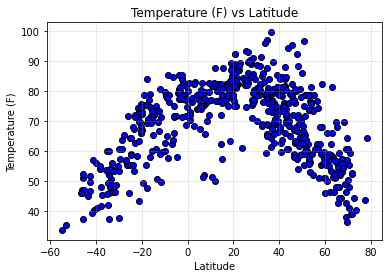

In [32]:
# Create scatter plot of Lat vs Temp
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], edgecolor = 'black', facecolor = 'blue')
plt.title('Temperature (F) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)
plt.savefig('../Images/Temperature (F) vs Latitude.png')

In [37]:
print('Overall, as the latitude moves further away from 0 on either size the temperature decreases.')

Overall, as the latitude moves further away from 0 on either size the temperature decreases.


## Latitude vs. Humidity Plot

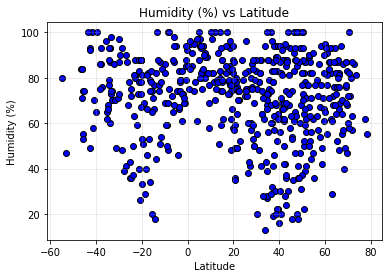

In [33]:
# Create scatter plot of Lat vs Humidity
plt.scatter(weather_data['Lat'], weather_data['Humidity'], edgecolor = 'black', facecolor = 'blue')
plt.title('Humidity (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)
plt.savefig('../Images/Humidity vs Latitude.png')

In [38]:
print('Here the plot is comparing the relationship with humidity and latitude.  As the citys latitude moves further away from 0 the humidity appears to increase.')

Here the plot is comparing the relationship with humidity and latitude.  As the citys latitude moves further away from 0 the humidity appears to increase.


## Latitude vs. Cloudiness Plot

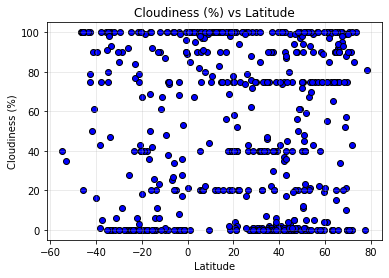

In [34]:
# Create scatter plot of Lat vs Cloudiness
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], edgecolor = 'black', facecolor = 'blue')
plt.title('Cloudiness (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)
plt.savefig('../Images/Cloudiness vs Latitude.png')

In [39]:
print('In this plot, looking at the relationship between cloudiness and where a city is located by latitude, there is a seemingly even amount of cities with high cloudiness percentage to cities with low cloudiness percentage.')

In this plot, looking at the relationship between cloudiness and where a city is located by latitude, there is a seemingly even amount of cities with high cloudiness percentage to cities with low cloudiness percentage.


## Latitude vs. Wind Speed Plot

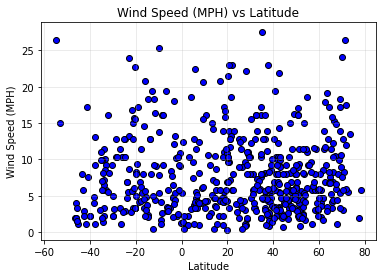

In [35]:
# Create scatter plot of Lat vs Wind Speed
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], edgecolor = 'black', facecolor = 'blue')
plt.title('Wind Speed (MPH) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.25)
plt.savefig('../Images/Wind Speed vs Latitude.png')

In [40]:
print('According to this plot, there appears to be a higher concentration of cities betwee 40 and 60 degrees latitude with a similar amount of wind speed occuring.')

According to this plot, there appears to be a higher concentration of cities betwee 40 and 60 degrees latitude with a similar amount of wind speed occuring.


## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = weather_data.loc[weather_data['Lat']>=0]
south_hem = weather_data.loc[weather_data['Lat']<0]

In [22]:
# Write a function that creates linear regression plots
def linear_regression(x,y):
    print(f'R-squared value: {round(st.pearsonr(x,y)[0],4)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress = x * slope + intercept
    line_eq = 'y= ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    plt.scatter(x,y)
    plt.plot(x, regress, 'r-')
    return line_eq
                     
# Write a function for regression line
def annotate(line_eq, x, y):
    plt.annotate(line_eq, (x, y), fontsize = 12, color = 'red')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared value: -0.6291


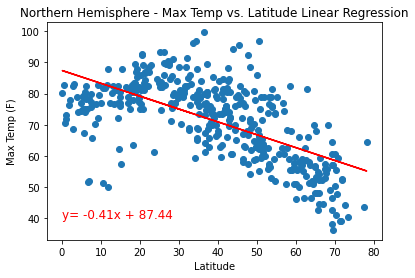

In [23]:
equation = linear_regression(north_hem['Lat'], north_hem['Max Temp'])
annotate(equation, 0, 40)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

plt.savefig('../Images/Northern Hemisphere - Max Temp vs Lat Linear Regression.png')

In [41]:
print('In the Northern Hemisphere, there is a strong negative correlation between max temperature and latitude. Overall, as the latitude increases the temperature decreases.')

In the Northern Hemisphere, there is a strong negative correlation between max temperature and latitude. Overall, as the latitude increases the temperature decreases.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared value: 0.8043


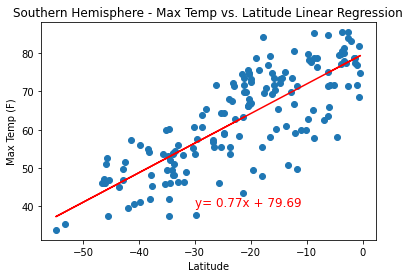

In [24]:
equation = linear_regression(south_hem['Lat'], south_hem['Max Temp'])
annotate(equation, -30, 40)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

plt.savefig('../Images/Southern Hemisphere - Max Temp vs Lat Linear Regression.png')

In [42]:
print('There is a strong postitive corelation between max temp and latitude in the Southern Hemisphere.')

There is a strong postitive corelation between max temp and latitude in the Southern Hemisphere.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared value: -0.1546


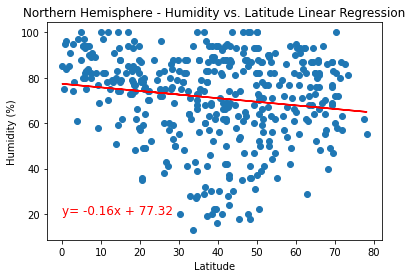

In [25]:
equation = linear_regression(north_hem['Lat'], north_hem['Humidity'])
annotate(equation, 0, 20)
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('../Images/Northern Hemisphere - Humidity vs Lat Linear Regression.png')

In [43]:
print('There is a moderate negative corelation between humidity and latitude in the Northern Hemisphere.')

There is a moderate negative corelation between humidity and latitude in the Northern Hemisphere.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared value: -0.0312


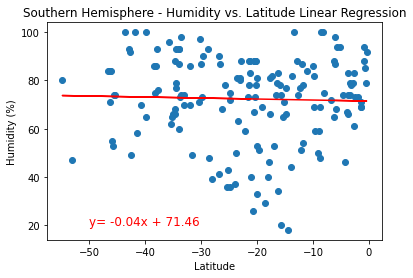

In [26]:
equation = linear_regression(south_hem['Lat'], south_hem['Humidity'])
annotate(equation, -50, 20)
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('../Images/Southern Hemisphere - Humidity vs Lat Linear Regression.png')

In [44]:
print('There is relatively little to no corelation between humidity and latitude in the Southern Hemisphere.')

There is relatively little to no corelation between humidity and latitude in the Southern Hemisphere.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared value: -0.075


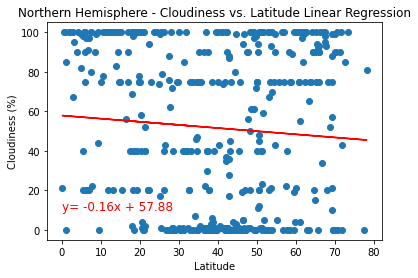

In [27]:
equation = linear_regression(north_hem['Lat'], north_hem['Cloudiness'])
annotate(equation, 0, 10)
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('../Images/Northern Hemisphere - Cloudiness vs Lat Linear Regression.png')

In [45]:
print('In the Northern Hemisphere, there is a weak negative corelation between cloudiness and latitude.')

In the Northern Hemisphere, there is a weak negative corelation between cloudiness and latitude.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared value: -0.1532


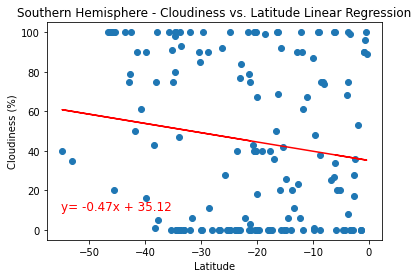

In [29]:
equation = linear_regression(south_hem['Lat'], south_hem['Cloudiness'])
annotate(equation, -55, 10)
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('../Images/Southern Hemisphere - Cloudiness vs Lat Linear Regression.png')

In [46]:
print('In the Southern Hemisphere, there is a moderately negative corelation between cloudiness and latitude.')

In the Southern Hemisphere, there is a moderately negative corelation between cloudiness and latitude.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared value: 0.0468


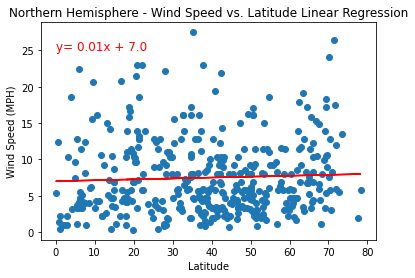

In [30]:
equation = linear_regression(north_hem['Lat'], north_hem['Wind Speed'])
annotate(equation, 0, 25)
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

plt.savefig('../Images/Northern Hemisphere - Wind Speed vs Lat Linear Regression.png')

In [47]:
print('In the Northern Hemisphere, there is relatively little to no corelation between wind speed and latitude.')

In the Northern Hemisphere, there is relatively little to no corelation between wind speed and latitude.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared value: 0.0844


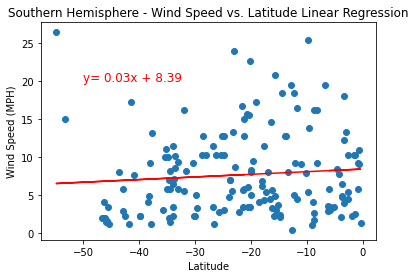

In [31]:
equation = linear_regression(south_hem['Lat'], south_hem['Wind Speed'])
annotate(equation, -50, 20)
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

plt.savefig('../Images/Southern Hemisphere - Wind Speed vs Lat Linear Regression.png')

In [48]:
print('In the Southern Hemisphere, there is relatively little to no corelation between wind speed and latitude.')

In the Southern Hemisphere, there is relatively little to no corelation between wind speed and latitude.


In [49]:
# Three observable trends based on the weather data:
# 1. There is little relationship between latitude and windspeed of a city regardless of which hemisphere the city is located.
# 2. In both the Northern and Southern Hemispheres, the more the city's latitude moves away from 0, the colder the temperature gets.
# 3. There is a stronger corelation between cloudiness in the Southern Hemisphere compared to the Northern Hemisphere.